In [2]:
import wooldridge as woo
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
import seaborn as sns
import math
import pandas as pd
import rpy2
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import linearmodels as plm

In [3]:
# I.1
jtrain = woo.data('jtrain')
data = jtrain[['year','fcode','lsales','lemploy','avgsal','tothrs','union','grant','totrain','hrsemp']]
data

,year,fcode,lsales,lemploy,avgsal,tothrs,union,grant,totrain,hrsemp
0,1987,410032.0,17.665659,4.605170,35000.0,12.0,0,0,100.0,12.000000
1,1988,410032.0,17.576710,4.875197,37000.0,8.0,0,0,50.0,3.053435
2,1989,410032.0,17.707331,4.812184,39000.0,8.0,0,0,50.0,3.252033
3,1987,410440.0,14.260197,2.484907,10500.0,12.0,0,0,12.0,12.000000
4,1988,410440.0,14.493544,2.564949,11000.0,12.0,0,0,13.0,12.000000
...,...,...,...,...,...,...,...,...,...,...
466,1988,419483.0,16.257858,4.682131,14810.0,0.0,1,0,0.0,0.000000
467,1989,419483.0,16.300417,4.859812,14227.0,20.0,1,0,20.0,3.100775
468,1987,419486.0,15.761420,4.382027,16000.0,0.0,0,0,0.0,0.000000
469,1988,419486.0,15.955577,4.499810,17000.0,0.0,0,0,0.0,0.000000


In [3]:
#Check if there are any missing observations
print(data.isnull().any())

# Since there missing obs, count how many per variable
print(data.isnull().sum())
# Deal with missing values by removing them
data = data.fillna(method = 'ffill')

year       False
fcode      False
lemploy     True
lsales      True
avgsal      True
tothrs      True
union      False
grant      False
totrain     True
hrsemp      True
dtype: bool
year        0
fcode       0
lemploy    31
lsales     98
avgsal     65
tothrs     56
union       0
grant       0
totrain     6
hrsemp     81
dtype: int64


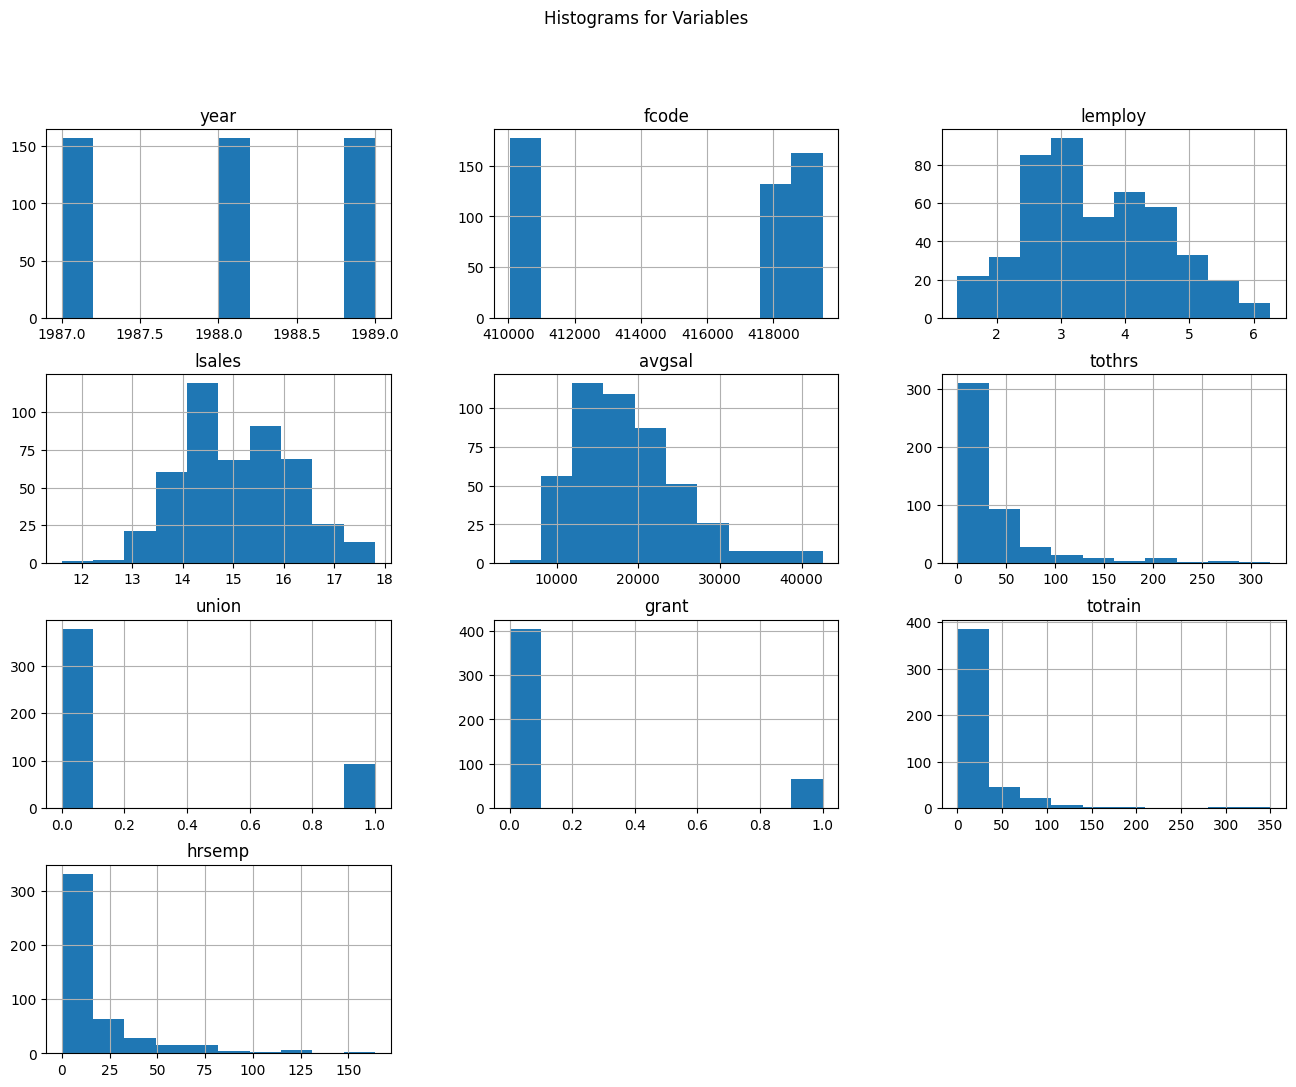

In [4]:
# I.2
# histplots
data.hist(figsize = (16,12))
plt.suptitle('Histograms for Variables')
plt.show()
# it seems that the distribution of each variables are not quite even

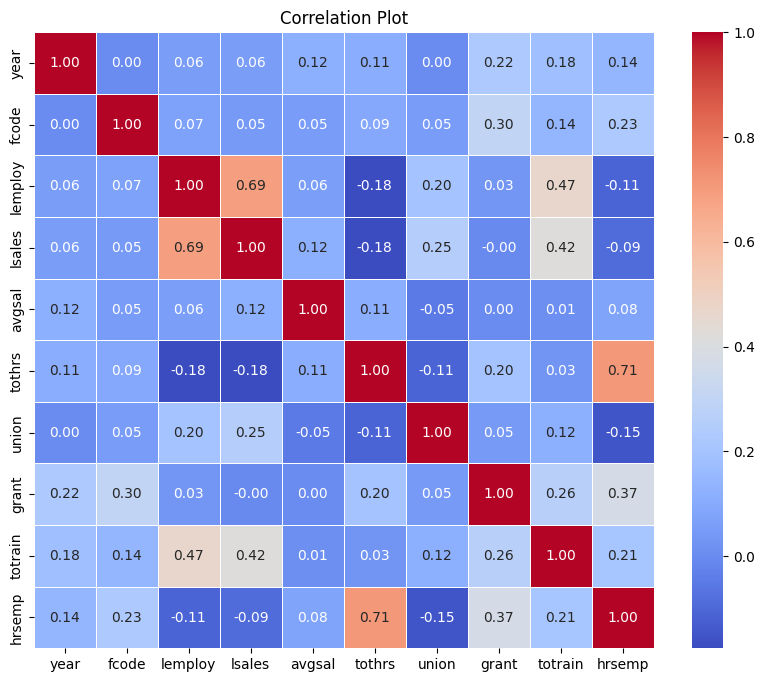

In [50]:
# correlation plot for data
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()
# The correlation between predictors isn't much signifiant

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dweibull,1.544548,517.075876,529.540451,inf,0.098488,0.000198
dgamma,1.587415,492.694577,505.159151,inf,0.070533,0.017540
gennorm,1.613357,516.003669,528.468244,inf,0.072826,0.012842
nakagami,1.621309,inf,inf,inf,0.054411,0.118520
invgauss,1.632090,539.557576,552.022150,inf,0.057134,0.088851


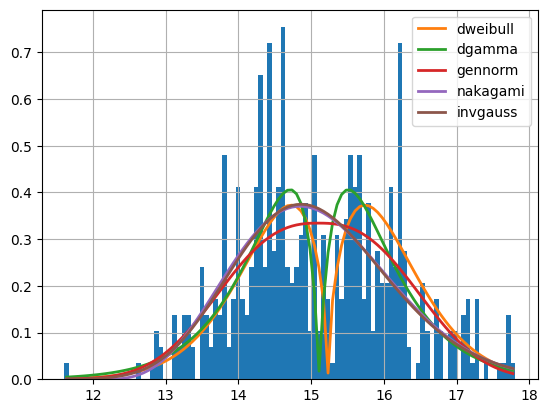

In [52]:
# use python Fitter to estimate distribution
# Fit various distributions for lsales:
from fitter import Fitter
f = Fitter(data.lsales)
f.fit()
f.summary()
# the best fitted distribution is dgamma

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
triang,3.644556,368.914400,381.378975,inf,0.045470,0.275990
dweibull,3.653187,392.018559,404.483133,inf,0.094271,0.000429
johnsonsb,3.734301,379.546079,396.165511,inf,0.052717,0.140774
skewnorm,3.744463,387.074872,399.539447,inf,0.075517,0.008795
gausshyper,3.747039,382.721627,407.650775,inf,0.056353,0.096640


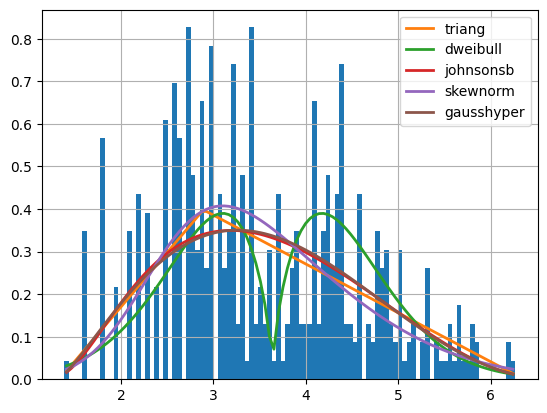

In [53]:
# use python Fitter to estimate distribution
# Fit various distributions for lemploy:
from fitter import Fitter
f = Fitter(data.lemploy)
f.fit()
f.summary()
# the best fitted distribution is triang

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pearson3,3.840854e-08,inf,inf,inf,0.028983,0.812614
genhyperbolic,3.847172e-08,2266.913086,2287.687376,inf,0.029353,0.800464
norminvgauss,3.851064e-08,2261.259448,2277.878881,inf,0.027936,0.845578
johnsonsu,3.854482e-08,2261.527562,2278.146995,inf,0.029237,0.804298
exponweib,3.857028e-08,2260.510266,2277.129698,inf,0.030416,0.764294


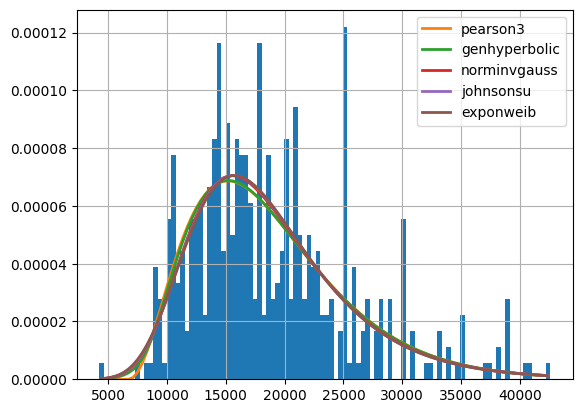

In [54]:
# use python Fitter to estimate distribution
# Fit various distributions for avgsal:
from fitter import Fitter
f = Fitter(data.avgsal)
f.fit()
f.summary()
# the best fitted distribution is exponweib

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
f,0.001764,1586.845762,1603.465195,inf,0.316542,1.861600e-42
levy,0.001911,1639.312131,1647.621848,inf,0.383468,8.317817e-63
halfgennorm,0.002032,1618.208711,1630.673285,inf,0.369548,3.280188e-58
genpareto,0.002066,1542.220346,1554.684921,inf,0.309979,1.079084e-40
ncf,0.002066,1569.904771,1590.679061,inf,0.309979,1.079084e-40


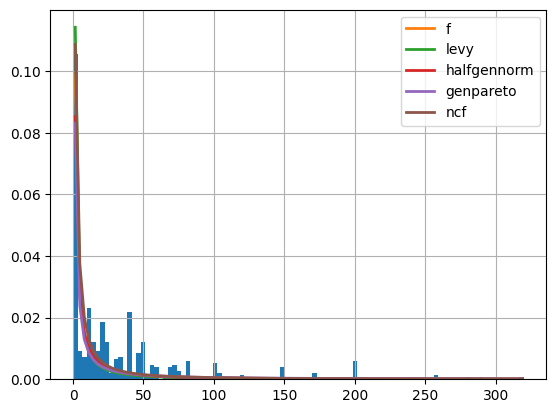

In [60]:
# use python Fitter to estimate distribution
# Fit various distributions for tothrs:
from fitter import Fitter
f = Fitter(data.tothrs)
f.fit()
f.summary()
# the best fitted distribution is genpareto

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfgennorm,0.000364,1803.979295,1816.443870,inf,0.290870,8.652432e-36
lomax,0.000367,1609.833241,1622.297815,inf,0.290870,8.652448e-36
ncf,0.000432,1599.264732,1620.039023,inf,0.290870,8.652432e-36
invgauss,0.000436,1667.458627,1679.923201,inf,0.255411,1.411580e-27
norminvgauss,0.000439,1671.798279,1688.417711,inf,2.176966,0.000000e+00


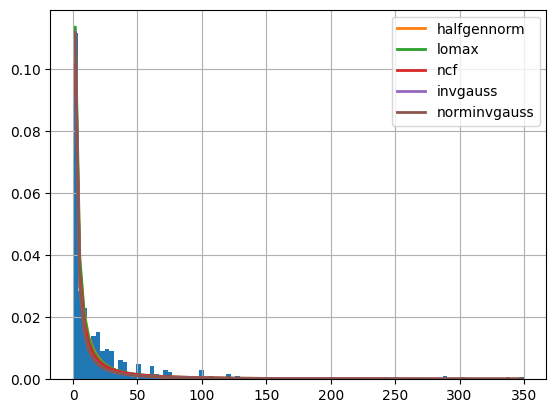

In [61]:
# use python Fitter to estimate distribution
# Fit various distributions for tothrs:
from fitter import Fitter
f = Fitter(data.totrain)
f.fit()
f.summary()
# the best fitted distribution is ncf

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
levy,0.002600,1508.321688,1516.631405,inf,0.295263,6.916562e-37
genpareto,0.002717,1395.819776,1408.284351,inf,0.288747,2.891701e-35
norminvgauss,0.002756,1492.878493,1509.497926,inf,4.527995,0.000000e+00
invgauss,0.002760,1491.111603,1503.576178,inf,0.281516,1.639761e-33
f,0.002907,1423.868391,1440.487823,inf,0.288747,2.891701e-35


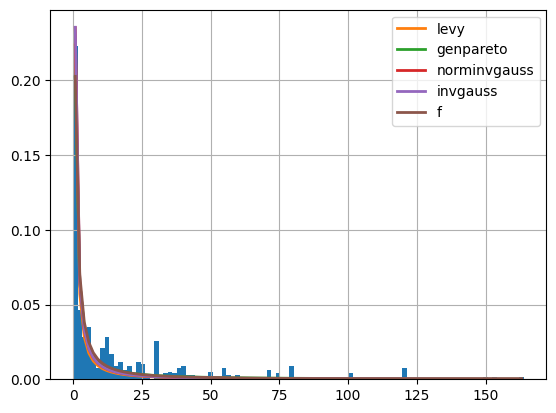

In [62]:
# use python Fitter to estimate distribution
# Fit various distributions for hrsemp:
from fitter import Fitter
f = Fitter(data.hrsemp)
f.fit()
f.summary()
# the best fitted distribution is genpareto	

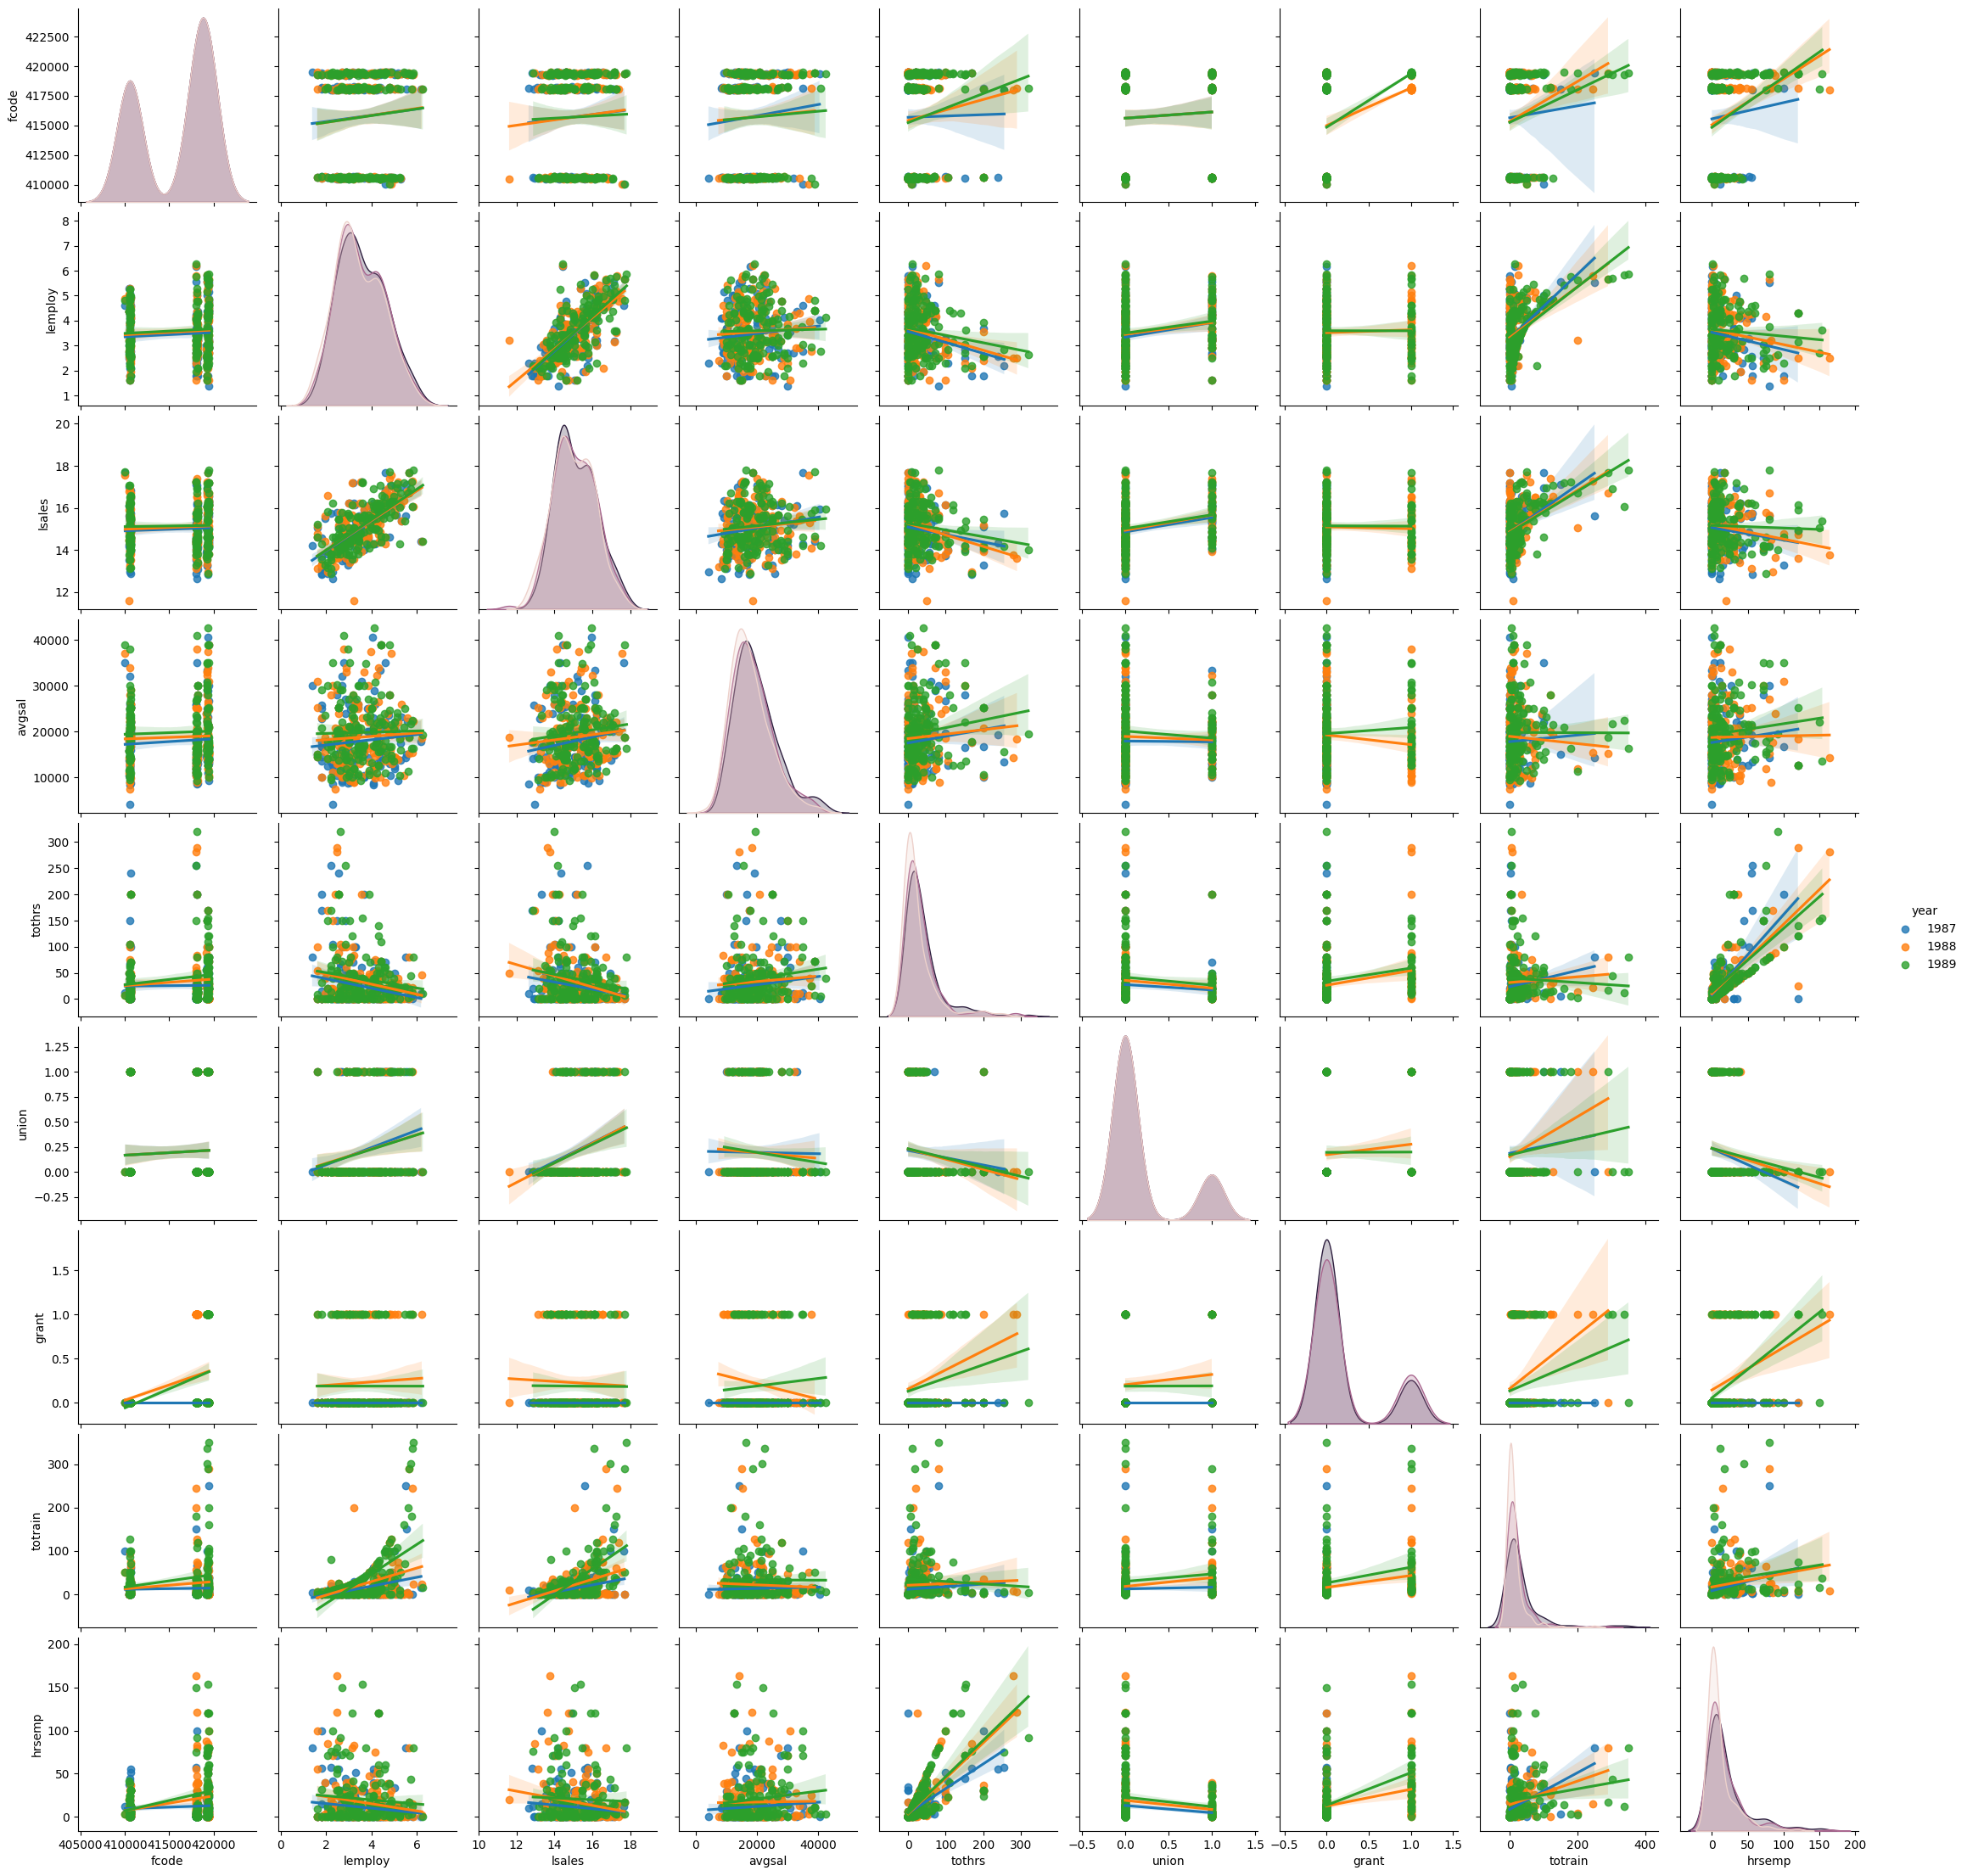

In [5]:
# scatter plots
sns.pairplot(data,hue = 'year', kind = 'reg')
# the relation between lsale and lemploy/totrain are significant 

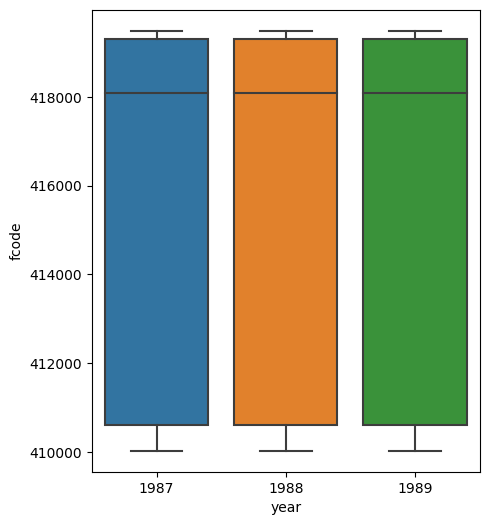

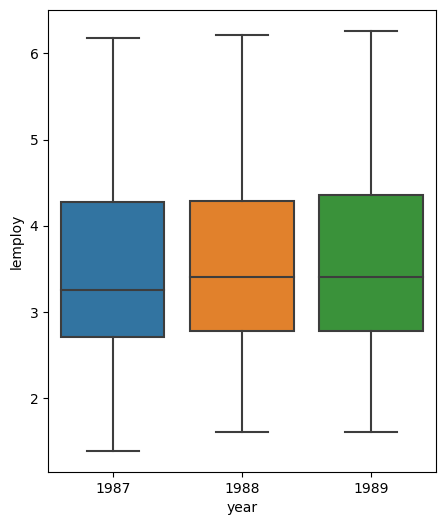

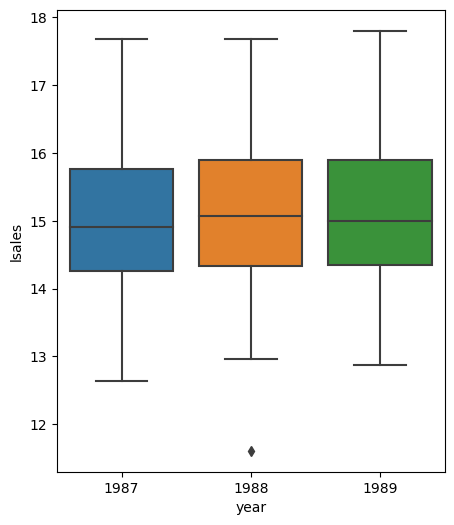

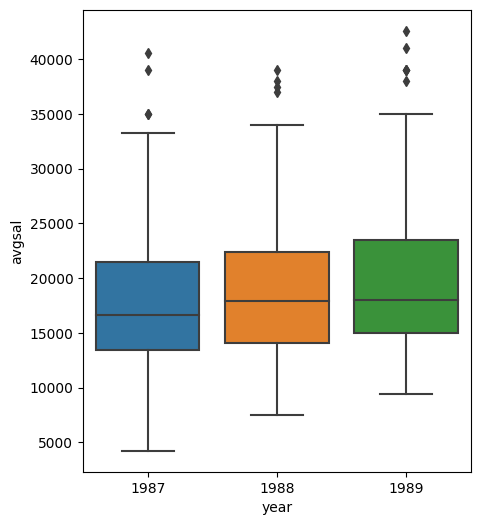

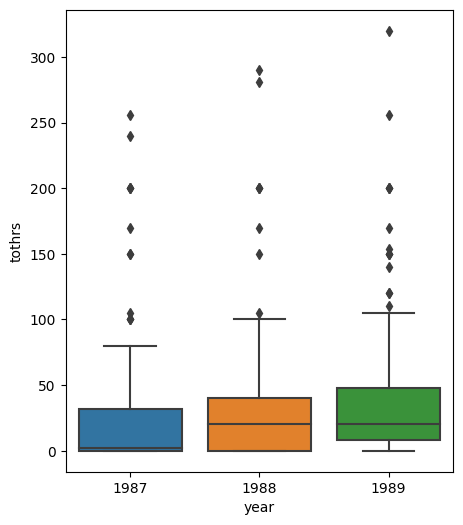

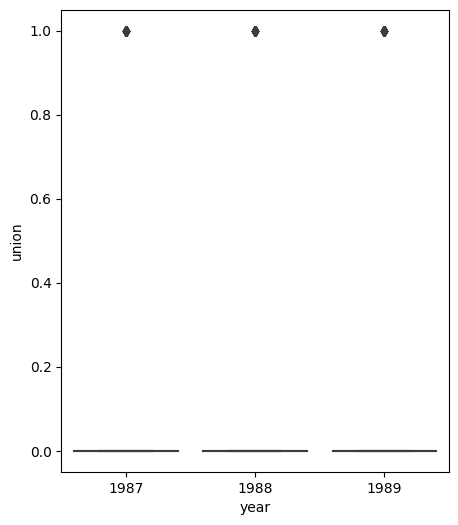

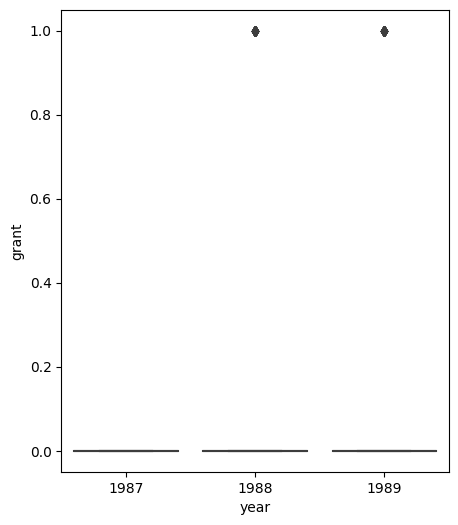

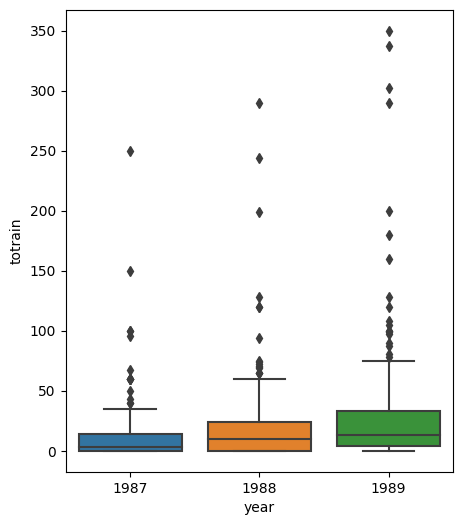

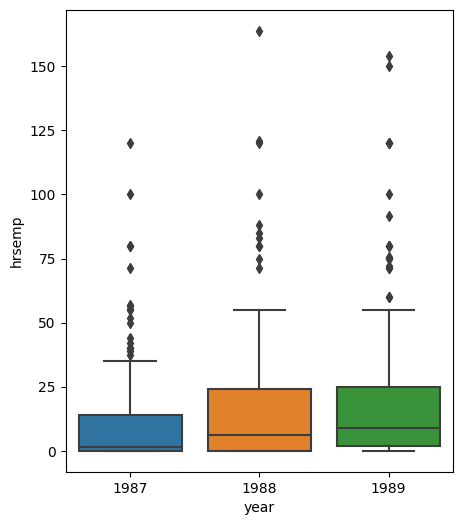

In [7]:
for column in data.columns[1:]:
    plt.figure(figsize = (5, 6))
    sns.boxplot(x = "year", y = column, data = data)
    plt.ylabel(column)
    plt.show()

In [9]:
# statistical summaries
for column in data.columns[1:]:
    five_number_summary = data[column].describe(percentiles=[.25, .5, .75])
    print(five_number_summary)
# the zeros in data are too much

count       471.000000
mean     415708.885350
std        4022.921891
min      410032.000000
25%      410604.000000
50%      418084.000000
75%      419309.000000
max      419486.000000
Name: fcode, dtype: float64
count    471.000000
mean       3.529521
std        1.030690
min        1.386294
25%        2.708050
50%        3.401197
75%        4.317488
max        6.263398
Name: lemploy, dtype: float64
count    471.000000
mean      15.075821
std        1.073343
min       11.608235
25%       14.293092
50%       14.946913
75%       15.859515
max       17.804495
Name: lsales, dtype: float64
count      471.000000
mean     18849.488323
std       6698.955897
min       4237.000000
25%      14105.000000
50%      17680.000000
75%      22360.000000
max      42583.000000
Name: avgsal, dtype: float64
count    471.000000
mean      32.407643
std       49.039752
min        0.000000
25%        0.000000
50%       15.000000
75%       40.000000
max      320.000000
Name: tothrs, dtype: float64
count    471.00

In [4]:
# I.3
data = data.dropna()
data2 = data.set_index(['fcode', 'year'], drop=False)


In [5]:
# pooled regression
reg_ols = plm.PooledOLS.from_formula(
    formula='lsales ~ lemploy + avgsal + tothrs + union + grant +'
            'totrain + hrsemp + C(year)', data=data2)
results_ols = reg_ols.fit()
results_ols
# pooled_ols = pd.DataFrame({'b': round(results_ols.params, 4),
#                           'se': round(results_ols.std_errors, 4),
#                           't': round(results_ols.tstats, 4),
#                           'pval': round(results_ols.pvalues, 4)})
# print(f'pooled_ols: \n{pooled_ols}\n')


Dep. Variable:,lsales,R-squared:,0.7770
Estimator:,PooledOLS,R-squared (Between):,0.8115
No. Observations:,302,R-squared (Within):,0.2526
Date:,"Tue, Dec 05 2023",R-squared (Overall):,0.7770
Time:,15:52:35,Log-likelihood,-238.22
Cov. Estimator:,Unadjusted,,
,,F-statistic:,113.03
Entities:,107,P-value,0.0000
Avg Obs:,2.8224,Distribution:,"F(9,292)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,2.24e+04


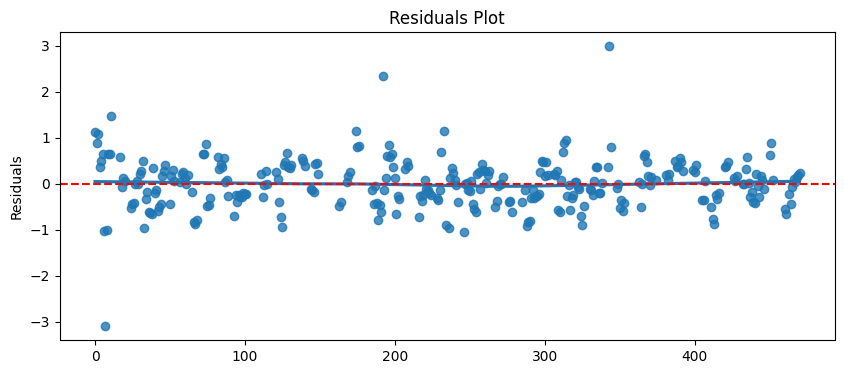

In [105]:

# Residuals Plot 
plt.figure(figsize = (10, 4))
sns.regplot(x = data.index, y = results_ols.resids,lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

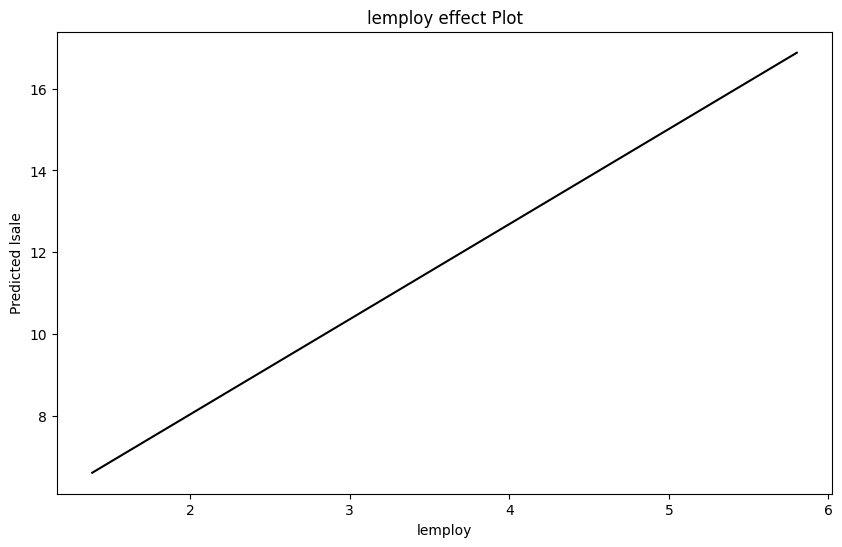

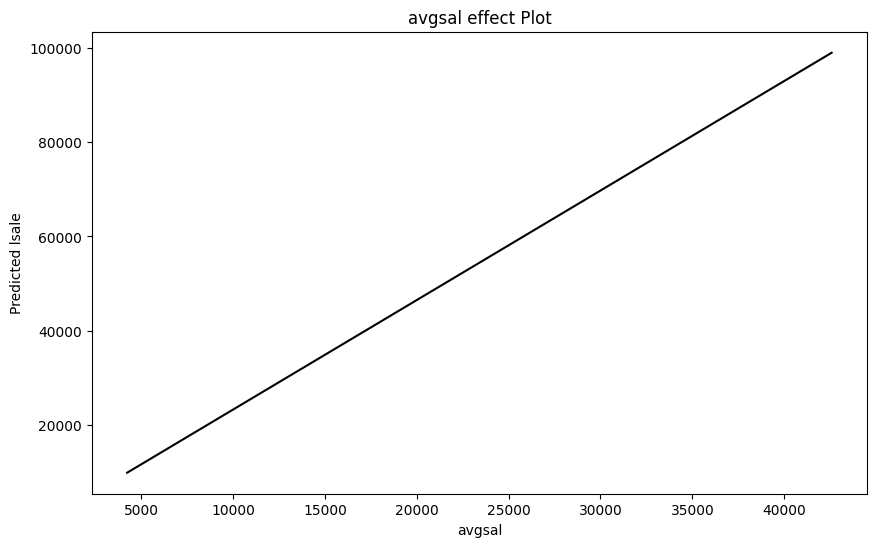

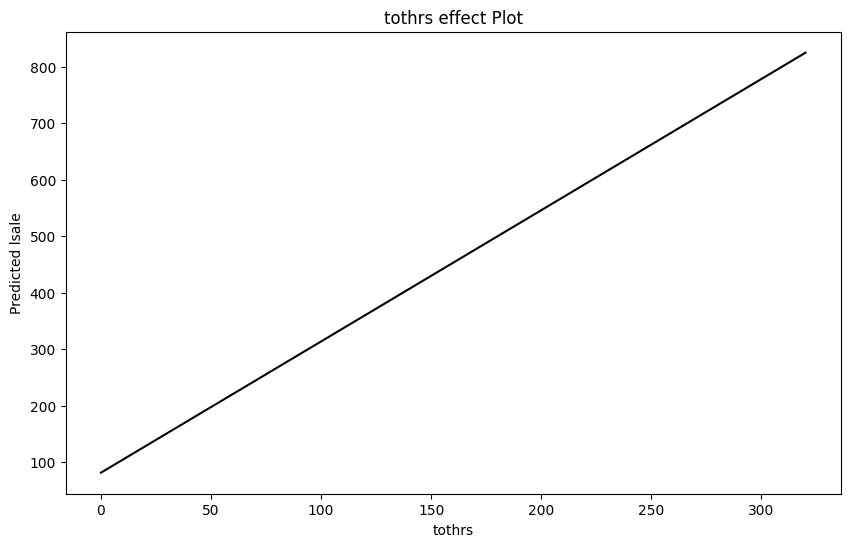

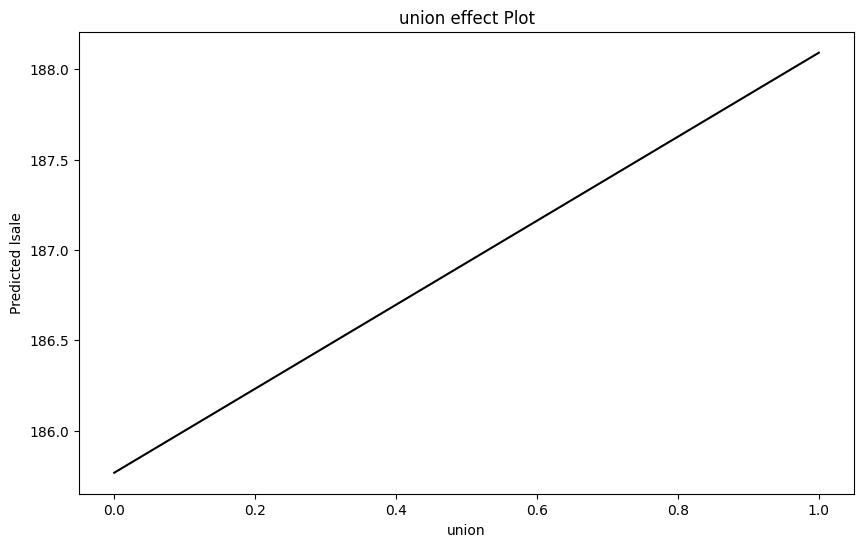

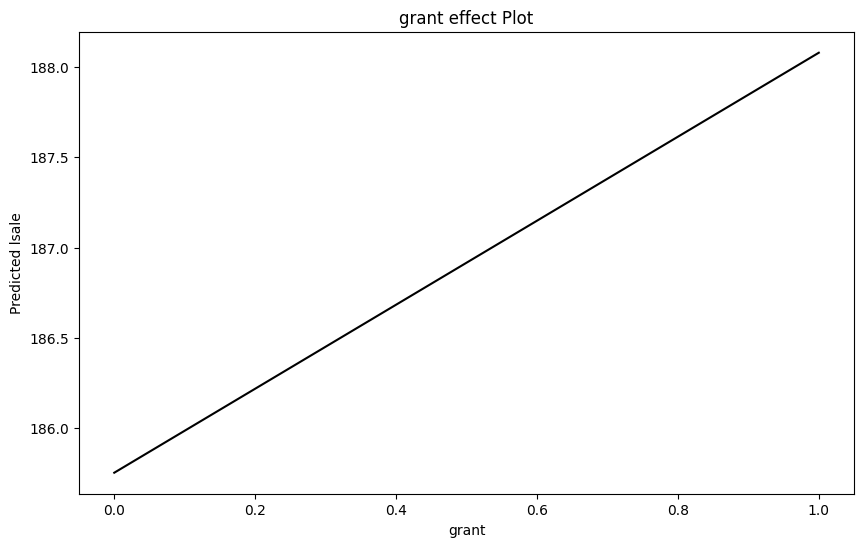

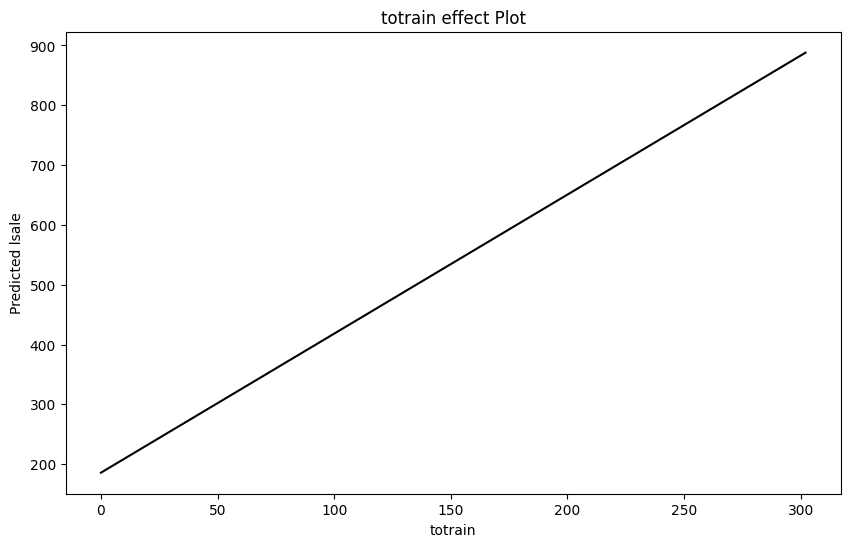

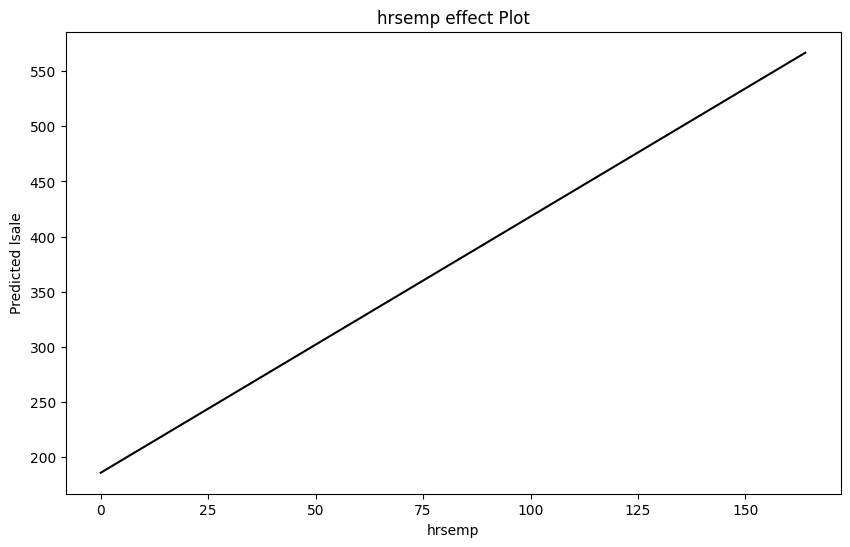

In [128]:
# Effect plots 
for column in data2.columns[3:]:
    xrange = np.linspace(data2[column].min(), data2[column].max(), 2000).reshape(2000,1)
    new_data = pd.DataFrame(xrange, columns = [column])
    new_data['year'] = data2.year.mean()
    new_data['fcode'] = data2.fcode.mean()
    new_data['lemploy'] = data2.lemploy.mean()
    new_data['avgsal'] = data2.avgsal.mean()
    new_data['tothrs'] = data2.tothrs.mean()
    new_data['union'] = data2.union.mean()
    new_data['grant'] = data2.grant.mean()
    new_data['totrain'] = data2.totrain.mean()
    new_data['hrsemp'] = data2.hrsemp.mean()
    new_data[column] = xrange
    new_data = new_data.set_index(['fcode', 'year'], drop=True)

    predictions = results_ols.predict(new_data)
    
    plt.figure(figsize = (10, 6))

    plt.plot(new_data[column], predictions, color = "black")

    plt.title(column +' effect Plot')
    plt.xlabel(column)
    plt.ylabel("Predicted lsale")

# # confidence Intervals
# plt.fill_between(new_data['lemploy'], predictions["mean_ci_lower"], predictions["mean_ci_upper"],
#                  color = "grey", linestyle = '--', alpha = .5)

# # Fun fact - the legend is labelled in the order you draw each plot element!
# plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

In [10]:
# Random effect regression
reg_re = plm.RandomEffects.from_formula(
    formula='lsales ~ lemploy + avgsal + tothrs + union + grant +'
            'totrain + hrsemp+C(year)', data=data2)
results_re = reg_re.fit()
# re_ols = pd.DataFrame({'b': round(results_ols.params, 4),
#                           'se': round(results_ols.std_errors, 4),
#                           't': round(results_ols.tstats, 4),
#                           'pval': round(results_ols.pvalues, 4)})
# print(f'random_effect_ols: \n{re_ols}\n')
results_re

Dep. Variable:,lsales,R-squared:,0.7888
Estimator:,RandomEffects,R-squared (Between):,0.8000
No. Observations:,302,R-squared (Within):,0.3143
Date:,"Tue, Dec 05 2023",R-squared (Overall):,0.7706
Time:,15:53:22,Log-likelihood,-49.385
Cov. Estimator:,Unadjusted,,
,,F-statistic:,121.15
Entities:,107,P-value,0.0000
Avg Obs:,2.8224,Distribution:,"F(9,292)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,1.068e+04


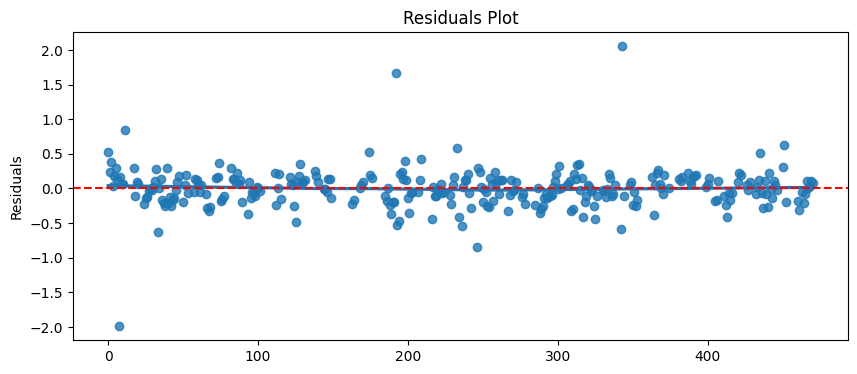

In [130]:
# Residuals Plot 
plt.figure(figsize = (10, 4))
sns.regplot(x = data.index, y = results_ols.resids,lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

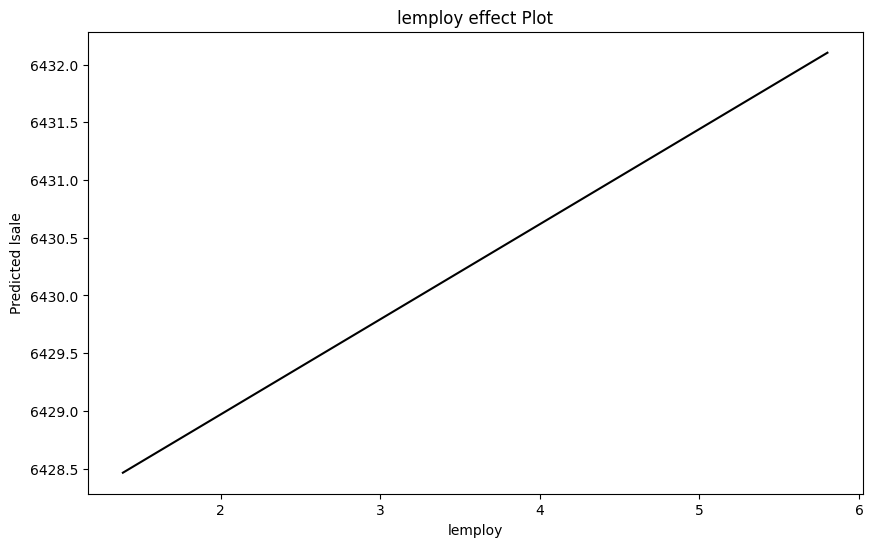

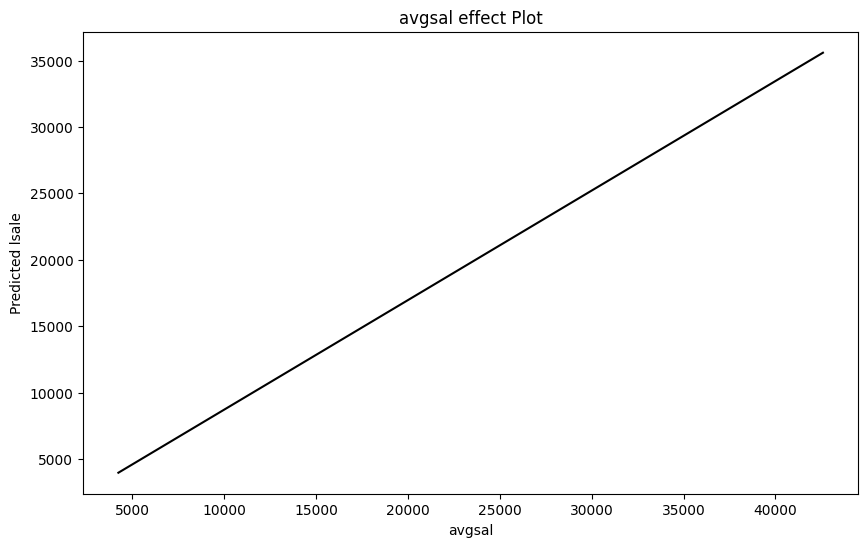

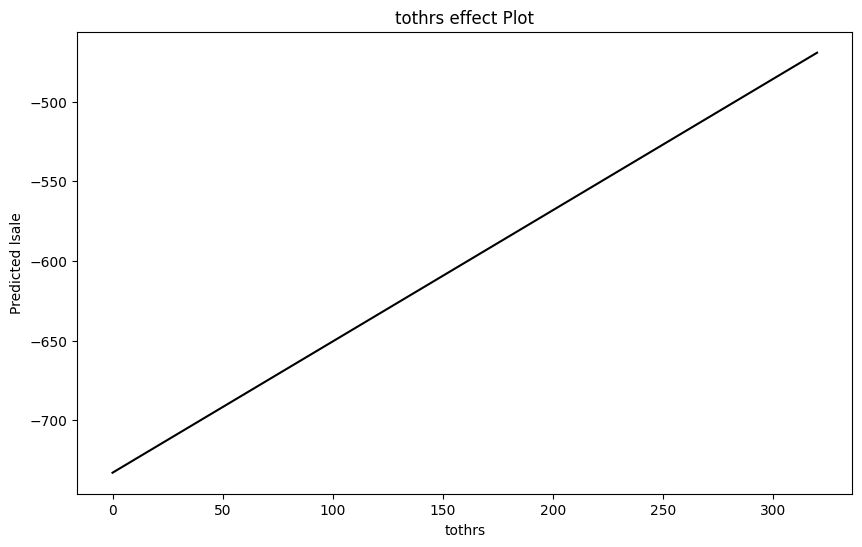

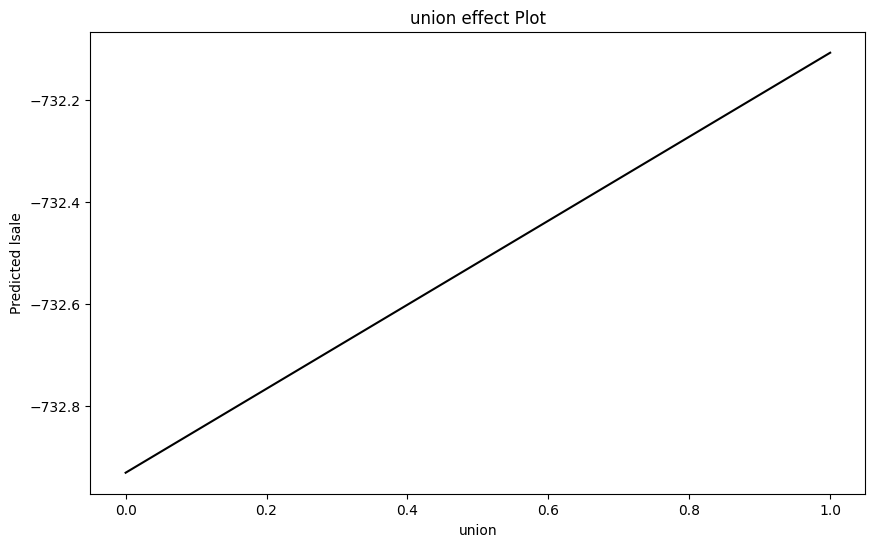

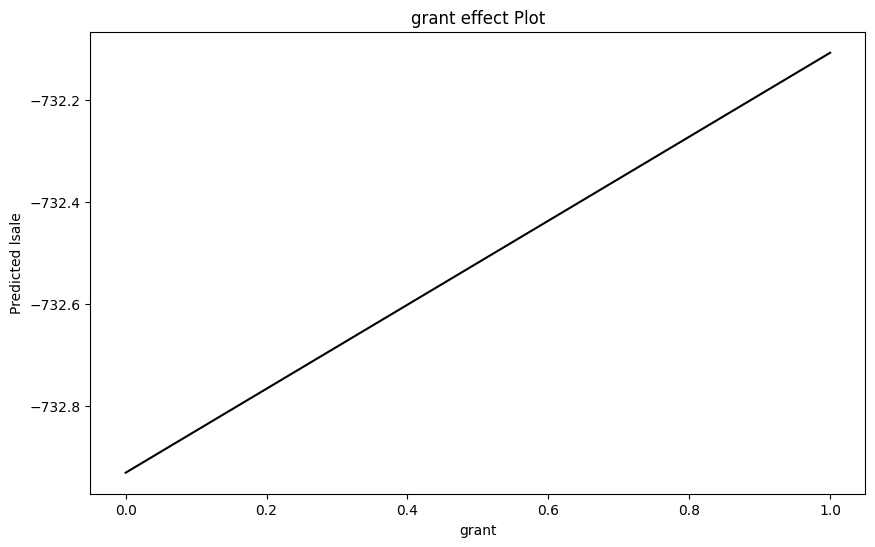

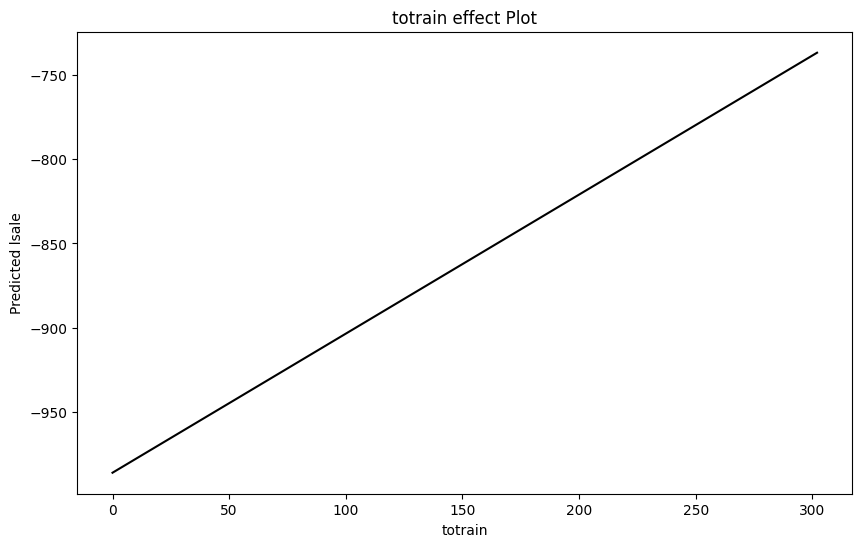

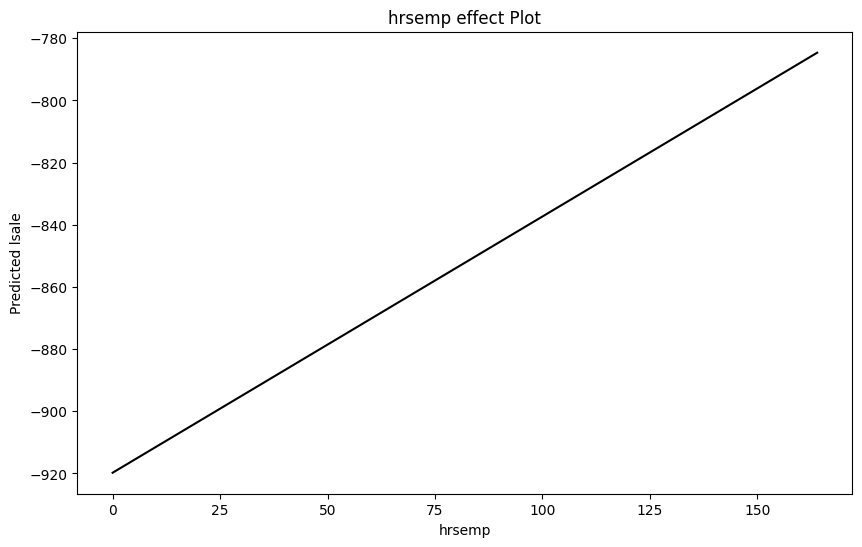

In [134]:
# Effect plots 
for column in data2.columns[3:]:
    xrange = np.linspace(data2[column].min(), data2[column].max(), 2000).reshape(2000,1)
    new_data = pd.DataFrame(xrange, columns = [column])
    new_data['year'] = data2.year.mean()
    new_data['fcode'] = data2.fcode.mean()
    new_data['lemploy'] = data2.lemploy.mean()
    new_data['avgsal'] = data2.avgsal.mean()
    new_data['tothrs'] = data2.tothrs.mean()
    new_data['union'] = data2.union.mean()
    new_data['grant'] = data2.grant.mean()
    new_data['totrain'] = data2.totrain.mean()
    new_data['hrsemp'] = data2.hrsemp.mean() 
    new_data['lsales'] = data2.lsales.mean()
    new_data[column] = xrange
    new_data = new_data.set_index(['fcode', 'year'], drop=False)

    predictions = results_ols.predict(new_data)
    
    plt.figure(figsize = (10, 6))

    plt.plot(new_data[column], predictions, color = "black")

    plt.title(column +' effect Plot')
    plt.xlabel(column)
    plt.ylabel("Predicted lsale")

# # confidence Intervals
# plt.fill_between(new_data['lemploy'], predictions["mean_ci_lower"], predictions["mean_ci_upper"],
#                  color = "grey", linestyle = '--', alpha = .5)

# # Fun fact - the legend is labelled in the order you draw each plot element!
# plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

In [11]:
# fixed effect regression
reg_fe = plm.PanelOLS.from_formula(
    formula='lsales ~ avgsal +'
            'totrain + hrsemp+EntityEffects', data=data2)
results_fe = reg_fe.fit()
# re_ols = pd.DataFrame({'b': round(results_ols.params, 4),
#                           'se': round(results_ols.std_errors, 4),
#                           't': round(results_ols.tstats, 4),
#                           'pval': round(results_ols.pvalues, 4)})
# print(f'random_effect_ols: \n{re_ols}\n')
results_fe

Dep. Variable:,lsales,R-squared:,0.1497
Estimator:,PanelOLS,R-squared (Between):,0.1311
No. Observations:,302,R-squared (Within):,0.1497
Date:,"Tue, Dec 05 2023",R-squared (Overall):,0.1315
Time:,15:53:31,Log-likelihood,-15.919
Cov. Estimator:,Unadjusted,,
,,F-statistic:,11.264
Entities:,107,P-value,0.0000
Avg Obs:,2.8224,Distribution:,"F(3,192)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,11.264


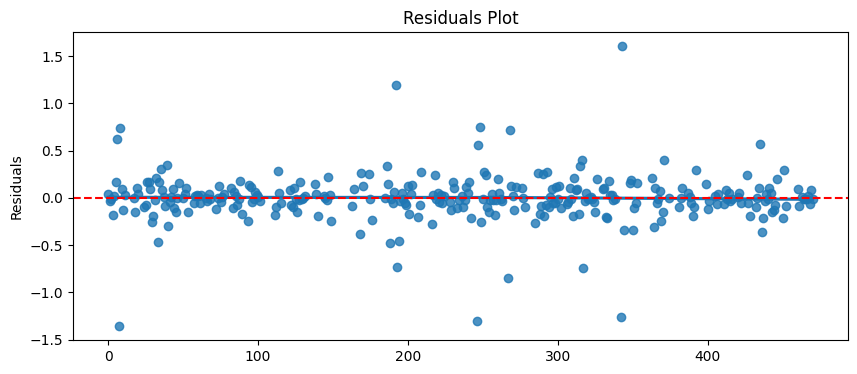

In [8]:
# Residuals Plot 
plt.figure(figsize = (10, 4))
sns.regplot(x = data.index, y = results_ols.resids,lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

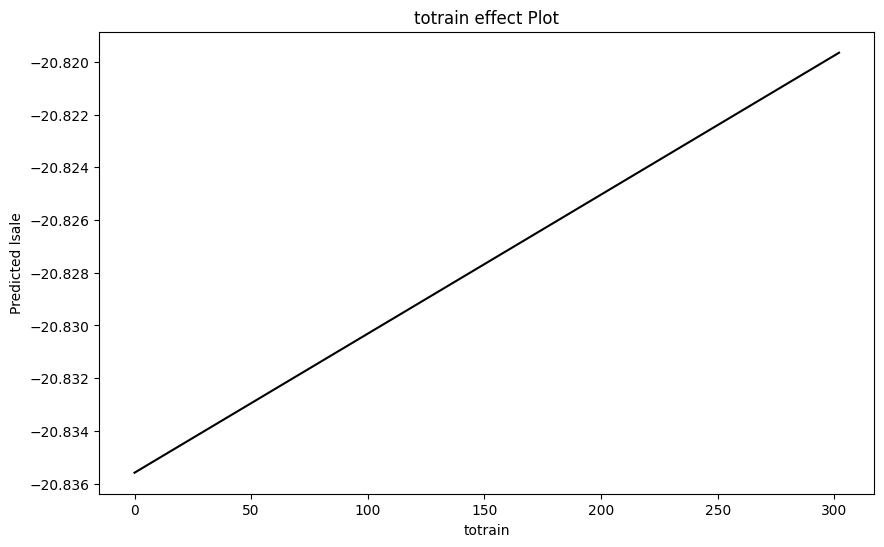

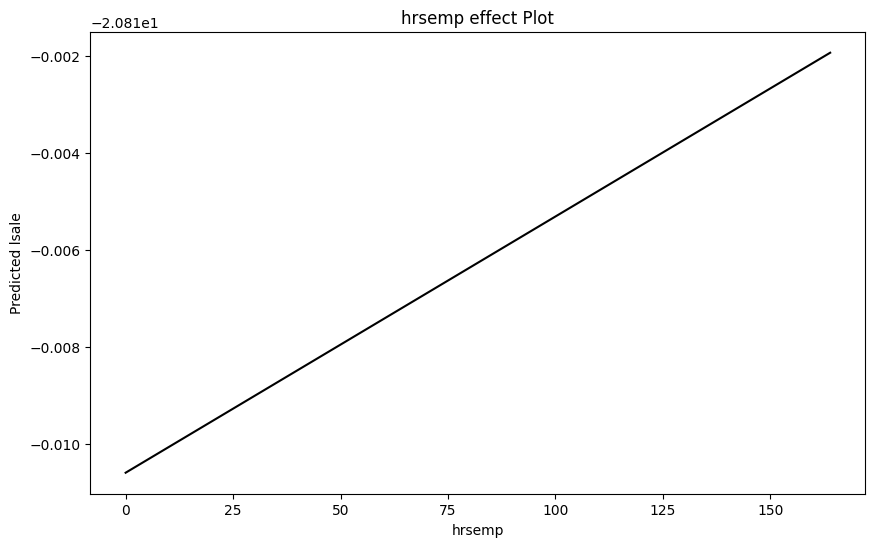

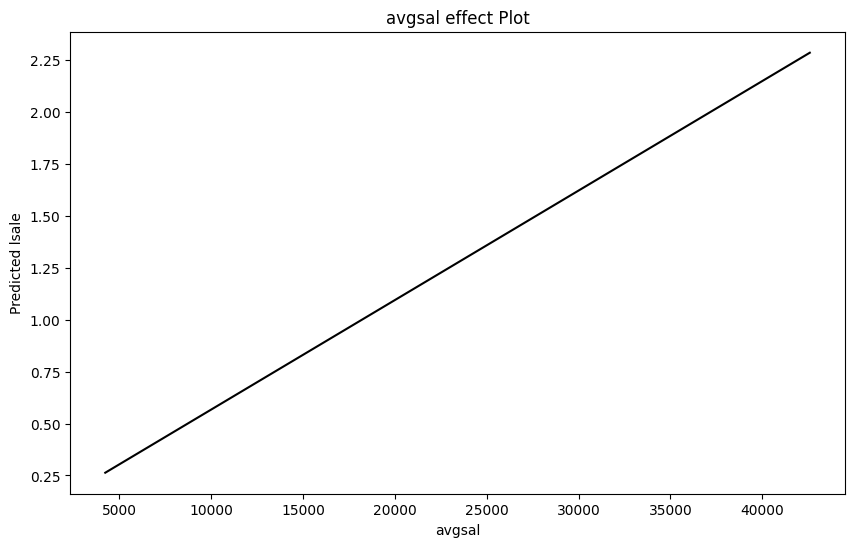

In [152]:
# Effect plots 
for column in ['totrain','hrsemp','avgsal']:
    xrange = np.linspace(data2[column].min(), data2[column].max(), 2000).reshape(2000,1)
    new_data = pd.DataFrame(xrange, columns = [column])
    new_data['year'] = data2.year.mean()
    new_data['fcode'] = data2.fcode.mean()
    new_data['totrain'] = data2.totrain.mean()
    new_data['hrsemp'] = data2.hrsemp.mean() 
    new_data['avgsal'] = data2.avgsal.mean()
    new_data[column] = xrange
    new_data = new_data.set_index(['fcode', 'year'], drop=True)

    predictions = results_ols.predict(new_data)
    
    plt.figure(figsize = (10, 6))

    plt.plot(new_data[column], predictions, color = "black")

    plt.title(column +' effect Plot')
    plt.xlabel(column)
    plt.ylabel("Predicted lsale")

# # confidence Intervals
# plt.fill_between(new_data['lemploy'], predictions["mean_ci_lower"], predictions["mean_ci_upper"],
#                  color = "grey", linestyle = '--', alpha = .5)

# # Fun fact - the legend is labelled in the order you draw each plot element!

In [16]:
# Use the Hausman Test to test which model is better
import wooldridge as woo
import numpy as np
import linearmodels as plm
import scipy.stats as stats


# estimation of FE and RE:


b_fe = results_fe.params
b_fe_cov = results_fe.cov



b_re = results_re.params
b_re_cov = results_re.cov

# Hausman test of FE vs. RE
# (I) find overlapping coefficients:
common_coef = set(results_fe.params.index).intersection(results_re.params.index)

# (II) calculate differences between FE and RE:
b_diff = np.array(results_fe.params[list(common_coef)] - results_re.params[list(common_coef)])
df = len(b_diff)
b_diff.reshape((df, 1))
b_cov_diff = np.array(b_fe_cov.loc[list(common_coef), list(common_coef)] -
                      b_re_cov.loc[list(common_coef), list(common_coef)])
b_cov_diff.reshape((df, df))

# (III) calculate test statistic:
stat = abs(np.transpose(b_diff) @ np.linalg.inv(b_cov_diff) @ b_diff)
pval = 1 - stats.chi2.cdf(stat, df)

print(f'stat: {stat}\n')
print(f'pval: {pval}\n')
# pval < 0.05, reject H0(RE is better than FE), the fixed effect model would be the preferred one.

stat: 28.79093002728747

pval: 2.477787077737048e-06



In [2]:
# II.
k401= woo.data('401ksubs')
data = k401[['e401k','inc','marr','age','nettfa','pira','p401k']]
data

,e401k,inc,marr,age,nettfa,pira,p401k
0,0,13.170000,0,40,4.575000,1,0
1,1,61.230000,0,35,154.000000,0,1
2,0,12.858000,1,44,0.000000,0,0
3,0,98.879997,1,44,21.799999,0,0
4,0,22.614000,0,53,18.450001,0,0
...,...,...,...,...,...,...,...
9270,0,58.428001,1,33,-1.200000,0,0
9271,0,24.546000,0,37,2.000000,0,0
9272,0,38.549999,1,33,-13.600000,1,0
9273,0,34.410000,1,57,3.550000,0,0


In [3]:
#Check if there are any missing observations
print(data.isnull().any())



e401k     False
inc       False
marr      False
age       False
nettfa    False
pira      False
p401k     False
dtype: bool


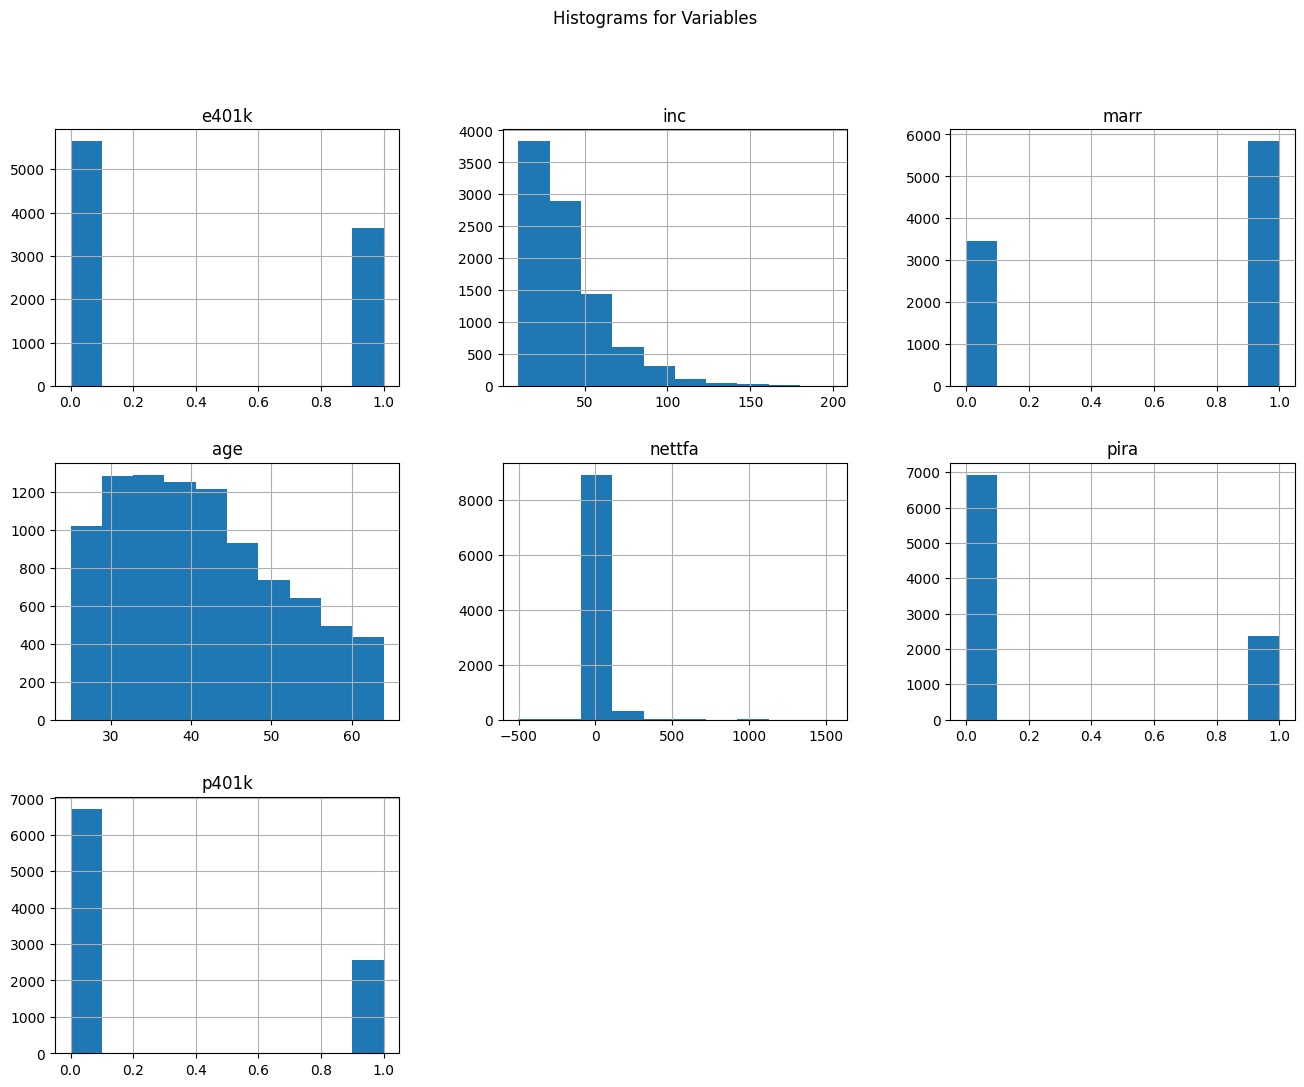

In [4]:
# I.2
# histplots
data.hist(figsize = (16,12))
plt.suptitle('Histograms for Variables')
plt.show()
# it seems that the distribution of each variables are not quite even

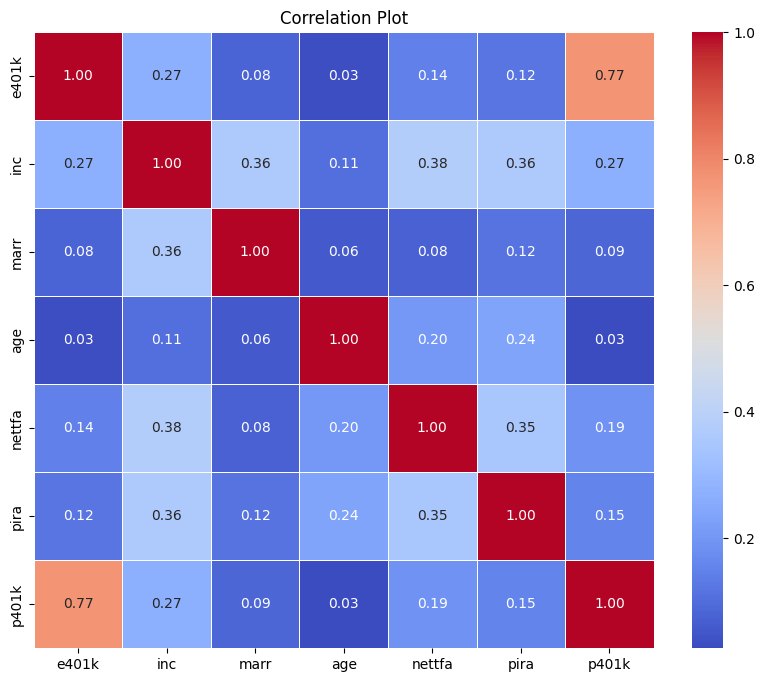

In [9]:
# correlation plot for data
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()
# The correlation between predictors isn't much signifiant

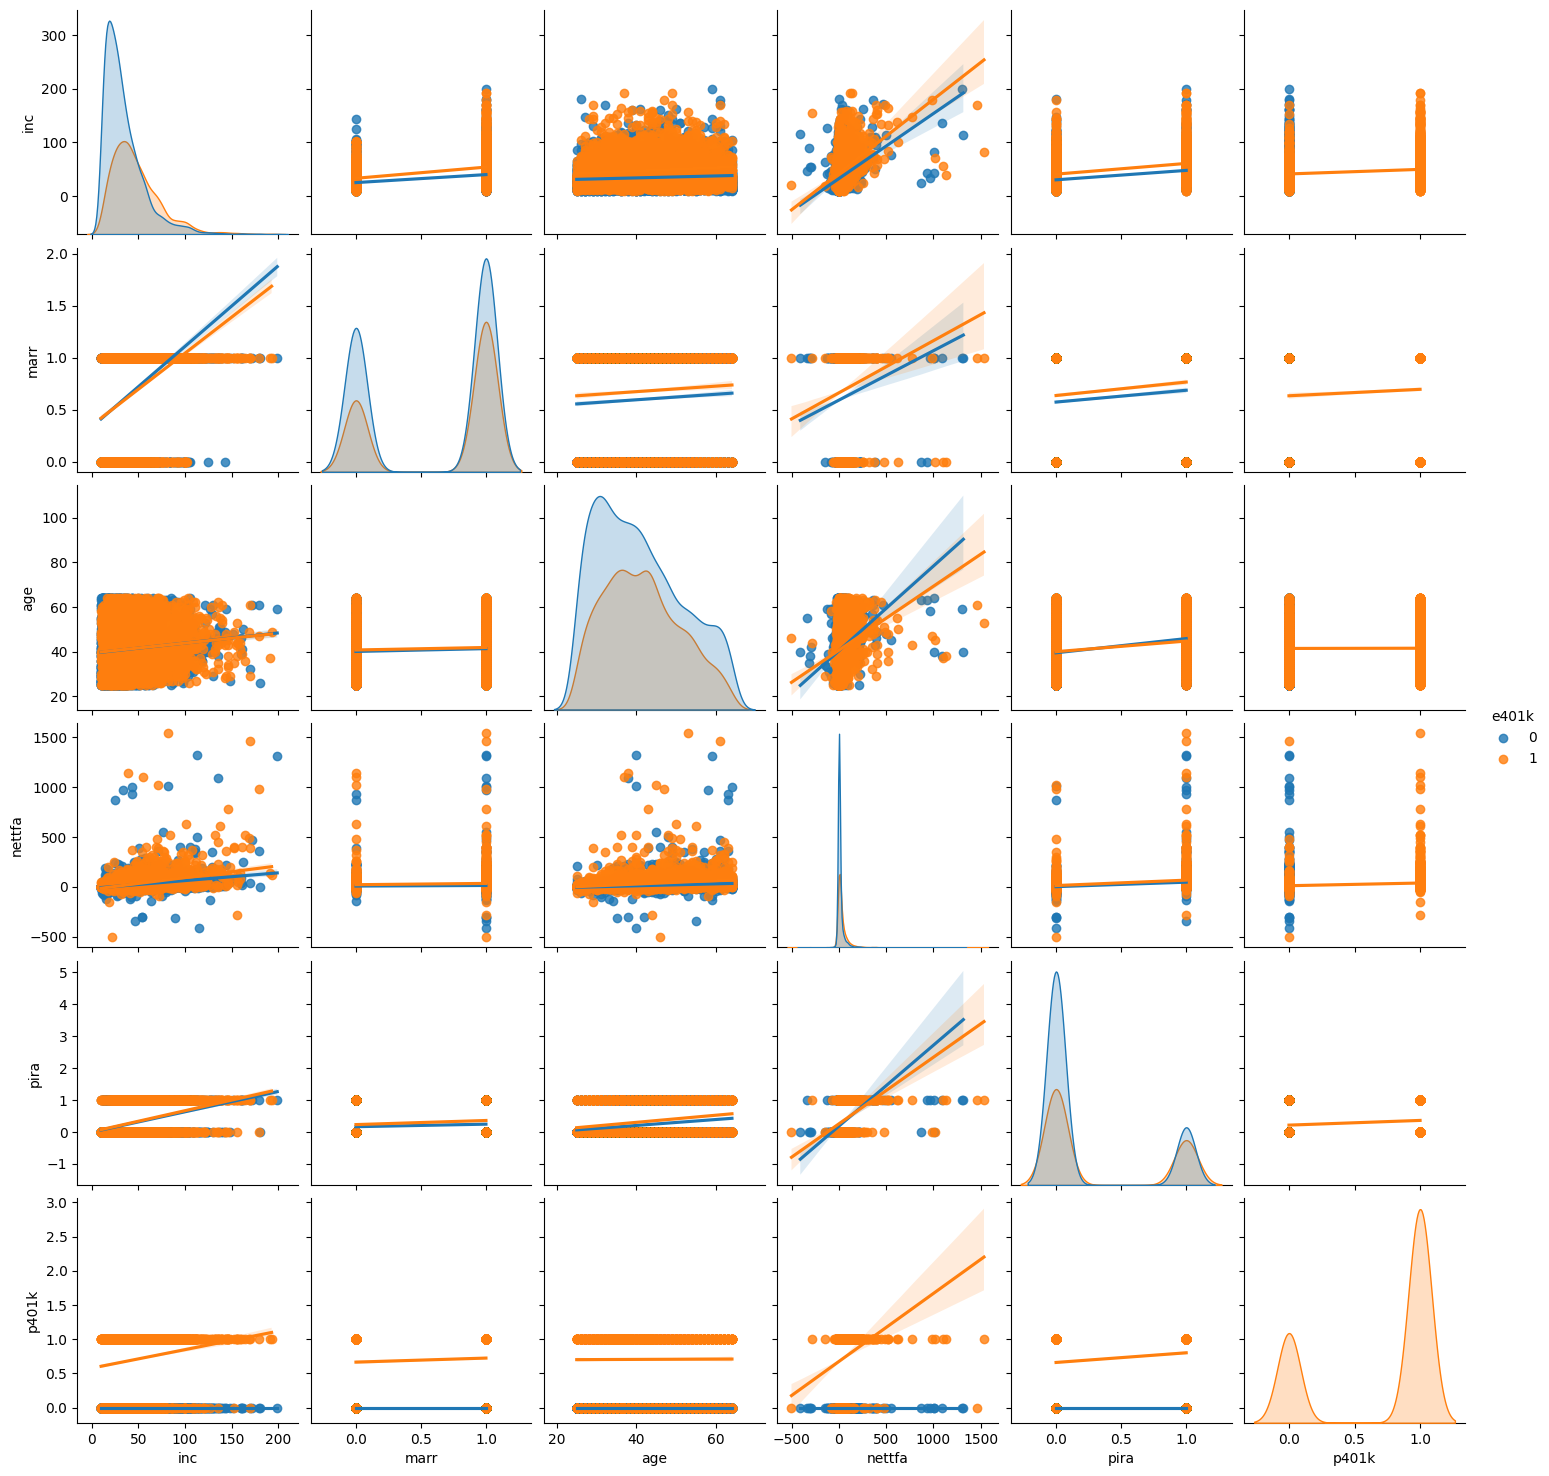

In [11]:
# scatter plots
sns.pairplot(data,hue = 'e401k', kind = 'reg')
# the relation between lsale and lemploy/totrain are significant 

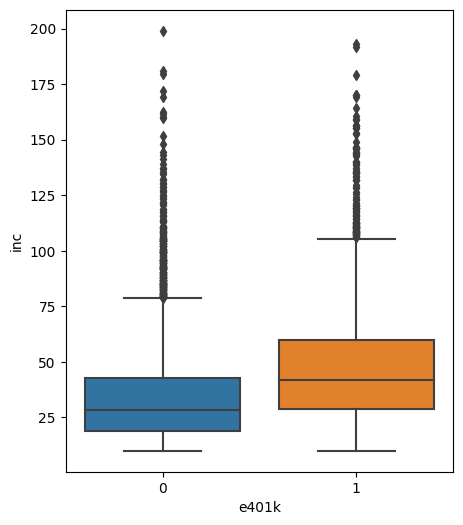

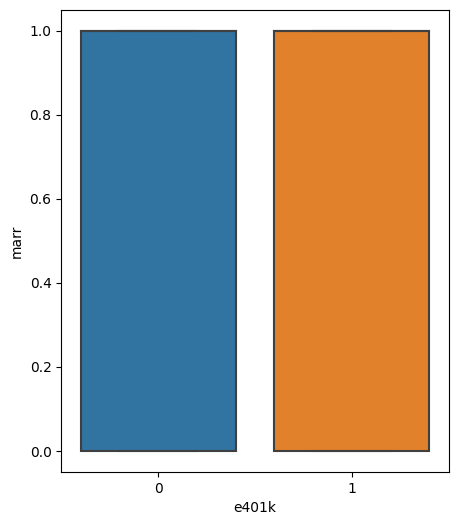

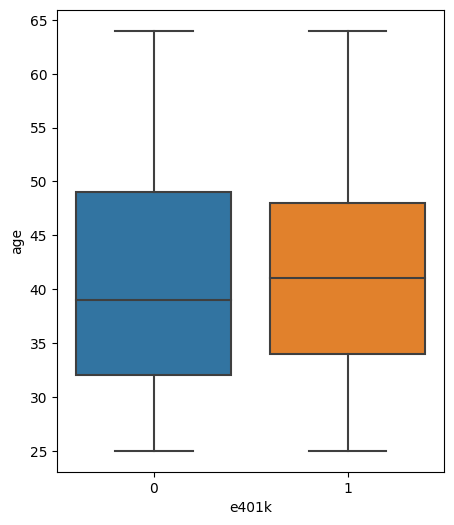

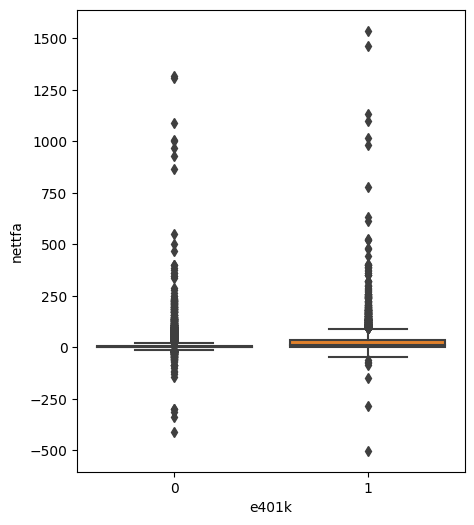

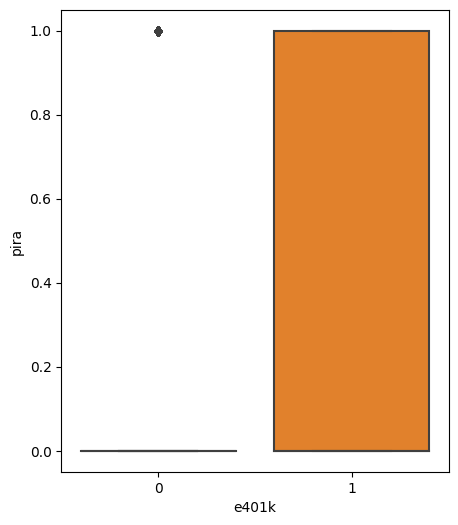

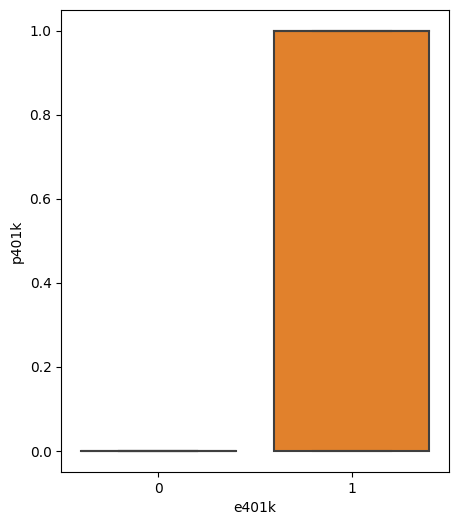

In [13]:
for column in data.columns[1:]:
    plt.figure(figsize = (5, 6))
    sns.boxplot(x = "e401k", y = column, data = data)
    plt.ylabel(column)
    plt.show()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED foldnorm distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED mielke distribution (taking m

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsb,0.113009,755.463140,784.003452,inf,0.037217,1.345017e-11
chi,0.113098,776.056492,797.461725,inf,0.047281,1.860082e-18
nakagami,0.113123,776.514345,797.919578,inf,0.050627,4.228861e-21
beta,0.113591,750.457837,778.998148,inf,0.054989,8.118039e-25
reciprocal,0.113709,746.813726,775.354038,inf,0.065773,2.499939e-35


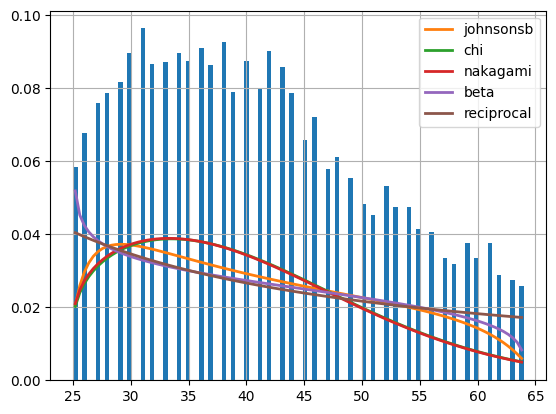

In [14]:
# use python Fitter to estimate distribution
# Fit various distributions for age:
from fitter import Fitter
f = Fitter(data.age)
f.fit()
f.summary()
# the best fitted distribution is sreciprocal

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED ex

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000051,1400.303461,1421.708695,inf,0.015692,2.053892e-02
moyal,0.000290,1464.254470,1478.524626,inf,0.034812,3.353970e-10
gumbel_r,0.000452,1544.182287,1558.452442,inf,0.049093,7.248488e-20
kstwobign,0.000476,1694.270072,1708.540228,inf,0.066003,1.421356e-35
expon,0.000648,1325.493843,1339.763998,inf,0.082449,2.696264e-55


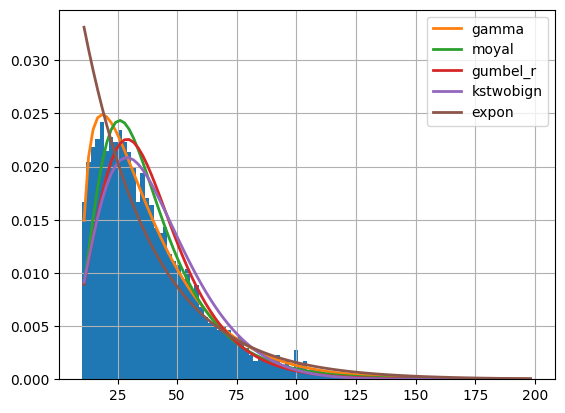

In [15]:
# Fit various distributions for inc:
from fitter import Fitter
f = Fitter(data.inc)
f.fit()
f.summary()
# the best fitted distribution is expon

In [16]:
# statistical summaries
for column in data.columns:
    five_number_summary = data[column].describe(percentiles=[.25, .5, .75])
    print(five_number_summary)
# the zeros in data are too much

count    9275.000000
mean        0.392129
std         0.488252
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: e401k, dtype: float64
count    9275.000000
mean       39.254641
std        24.090002
min        10.008000
25%        21.660000
50%        33.287998
75%        50.160000
max       199.041000
Name: inc, dtype: float64
count    9275.000000
mean        0.628571
std         0.483213
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: marr, dtype: float64
count    9275.000000
mean       41.080216
std        10.299517
min        25.000000
25%        33.000000
50%        40.000000
75%        48.000000
max        64.000000
Name: age, dtype: float64
count    9275.000000
mean       19.071675
std        63.963838
min      -502.302002
25%        -0.500000
50%         2.000000
75%        18.449500
max      1536.797974
Name: nettfa, dtype: float64
count    9275.000000
mea

In [5]:
# II.3
reg_lin = smf.ols(formula='p401k ~ e401k+inc+marr+age+nettfa+pira',
                  data=data)
results_lin = reg_lin.fit(cov_type='HC3')
results_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  p401k   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1655.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:57:51   Log-Likelihood:                -1437.9
No. Observations:                9275   AIC:                             2890.
Df Residuals:                    9268   BIC:                             2940.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.012      0.080      0.937      -0.023       0.025
e401k          0.6843      0.008     85.097      0.000       0.669       0.700
inc            0.0007      0.000      4.500      0.000       0.000       0.001
marr           0.0046      0.006      0.712      0.476      -0.008       0.017
age           -0.0010      0.000     -3.414      0.001      -0.002      -0.000
nettfa         0.0004   9.15e-05      4.428      0.000       0.000       0.001
pira           0.0368      0.008      4.446      0.000       0.021       0.053
==============================================================================
Omnibus:                     2063.347   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3892.784
Skew:                          -1.385   Prob(JB):                         0.00
Kurtosis:                       4.549   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

Accuracy = 0.8838814016172507


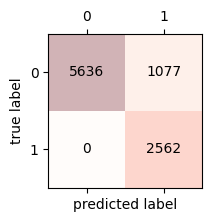

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(data['p401k'],np.where(results_lin.predict() < 0.5, 0, 1))
total1=sum(sum(conf_mat))
Accuracy = (conf_mat[0,0]+conf_mat[1,1])/total1
print('Accuracy =', Accuracy)
# Confusion matrix plot Raschka (2014)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

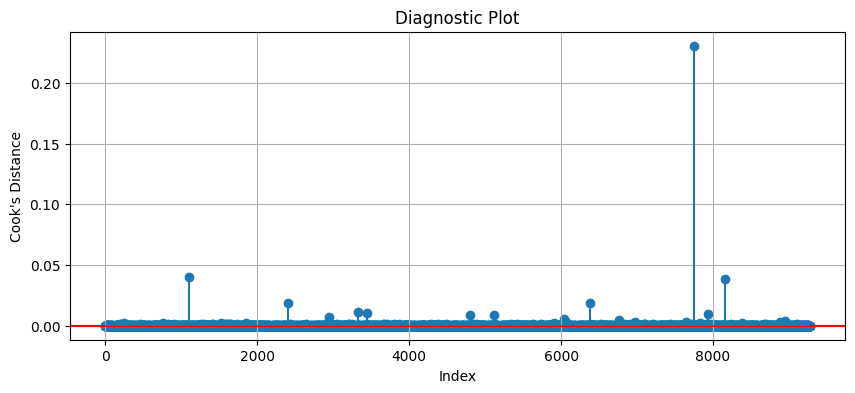

In [23]:
cooks_distance = results_lin.get_influence().cooks_distance[0]
plt.figure(figsize = (10, 4))
plt.scatter(data.index, cooks_distance)
plt.axhline(0, color = 'red')
plt.vlines(x = data.index, ymin = 0, ymax = cooks_distance)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()


In [10]:
reg_probit = smf.probit(formula='p401k ~ e401k+inc+marr+age+nettfa+pira',
                  data=data)
results_probit = reg_probit.fit(disp=0)
results_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                  p401k   No. Observations:                 9275
Model:                         Probit   Df Residuals:                     9268
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.6135
Time:                        22:59:57   Log-Likelihood:                -2112.5
converged:                      False   LL-Null:                       -5466.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1913    285.827     -0.036      0.972    -570.403     550.020
e401k         10.7179    285.827      0.037      0.970    -549.494     570.929
inc            0.0040      0.001      3.472      0.001       0.002       0.006
marr           0.0355      0.051      0.693      0.488      -0.065       0.136
age           -0.0085      0.002     -3.486      0.000      -0.013      -0.004
nettfa         0.0036      0.000      7.395      0.000       0.003       0.004
pira           0.2412      0.055      4.379      0.000       0.133       0.349
==============================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Accuracy = 0.8840970350404312


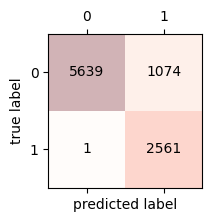

In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(data['p401k'],np.where(results_probit.predict() < 0.5, 0, 1))
total1=sum(sum(conf_mat))
Accuracy = (conf_mat[0,0]+conf_mat[1,1])/total1
print('Accuracy =', Accuracy)

# Confusion matrix plot Raschka (2014)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [11]:
reg_logit = smf.logit(formula='p401k ~ e401k+inc+marr+age+nettfa+pira',
                  data=data)
results_logit = reg_logit.fit(disp=0)
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  p401k   No. Observations:                 9275
Model:                          Logit   Df Residuals:                     9268
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.6192
Time:                        22:59:59   Log-Likelihood:                -2081.6
converged:                      False   LL-Null:                       -5466.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.9900   3200.439     -0.011      0.991   -6308.734    6236.754
e401k         37.0351   3200.439      0.012      0.991   -6235.709    6309.780
inc            0.0046      0.002      2.279      0.023       0.001       0.009
marr           0.0716      0.085      0.841      0.400      -0.095       0.238
age           -0.0191      0.004     -4.642      0.000      -0.027      -0.011
nettfa         0.0145      0.002      9.205      0.000       0.011       0.018
pira           0.2167      0.098      2.221      0.026       0.025       0.408
==============================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

[[5637 1076]
 [   2 2560]]
Accuracy = 0.8837735849056604


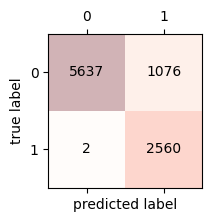

              precision    recall  f1-score   support

           0      1.000     0.840     0.913      6713
           1      0.704     0.999     0.826      2562

    accuracy                          0.884      9275
   macro avg      0.852     0.919     0.869      9275
weighted avg      0.918     0.884     0.889      9275

Accuracy = 0.8837735849056604
Specificity =  0.839713987784895
Sensitivity =  0.9992193598750976


In [20]:
# Use sklearn library to draw confusion matrix
from sklearn.linear_model import LogisticRegression #problem will be solved with scikit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import matplotlib.pyplot as plt
X_cols = ['e401k','inc','marr','age','nettfa','pira']
lr = LogisticRegression()
logit_mod = lr.fit(data[X_cols], data['p401k'])
conf_mat = confusion_matrix(data['p401k'], lr.predict(data[X_cols]))
print(conf_mat) 
print('Accuracy =', lr.score(data[X_cols],data['p401k']))

# Confusion matrix plot Raschka (2014)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# We can print other metrics
print(classification_report(data['p401k'], lr.predict(data[X_cols]), digits=3))

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cm1 = confusion_matrix(data['p401k'], lr.predict(data[X_cols]))
total1=sum(sum(cm1))
Accuracy = (cm1[0,0]+cm1[1,1])/total1
Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Accuracy =', Accuracy)
print('Specificity = ', Specificity)
print('Sensitivity = ', Sensitivity)